# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Users/royjiang/Desktop/UCI-VIRT-DATA-PT-10-2022-U-LOLC/module6startercode/Instructions/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [68]:
output_data = pd.read_csv(output_data_file)
output_data.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [69]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

In [70]:
output_data["City"]

0        ostrovnoy
1        mahebourg
2          qaanaaq
3           zhuhai
4        cape town
          ...     
543         yabrud
544        paraiso
545        veraval
546    novyy urgal
547        tongren
Name: City, Length: 548, dtype: object

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [71]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

response = requests.get(query_url + city).json()
print(json.dumps(response, indent=4))

{
    "coord": {
        "lon": -73.9662,
        "lat": 42.6001
    },
    "weather": [
        {
            "id": 802,
            "main": "Clouds",
            "description": "scattered clouds",
            "icon": "03n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 25.27,
        "feels_like": 18.21,
        "temp_min": 23.23,
        "temp_max": 27.23,
        "pressure": 1018,
        "humidity": 42
    },
    "visibility": 10000,
    "wind": {
        "speed": 5.99,
        "deg": 257,
        "gust": 13
    },
    "clouds": {
        "all": 28
    },
    "dt": 1668989698,
    "sys": {
        "type": 2,
        "id": 19530,
        "country": "US",
        "sunrise": 1668945215,
        "sunset": 1668979784
    },
    "timezone": -18000,
    "id": 5106841,
    "name": "Albany",
    "cod": 200
}


In [72]:
City = []
Lat	= []
Lng	= []
Max_Temp = []	
Humidity = []	
Cloudiness = []	
Wind_Speed = []	
Country_Date = []

processing_record = 1
print("Beginning Data Retrieval")
print("----------------------------")

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        City.append(response['name'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp'])	
        Humidity.append(response['main']['humidity'])	
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])	
        Country_Date.append(response['dt'])
        city_name = response['name']	
        
        print(f"Processing Record {processing_record} | {city_name}")
        processing_record += 1
    
    except:
        print("City not found. Skipping...")
    continue
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")



s
Processing Record 12 | Port Elizabeth
Processing Record 13 | Geraldton
Processing Record 14 | Lorengau
Processing Record 15 | Bluff
Processing Record 16 | Hobart
Processing Record 17 | Kidal
Processing Record 18 | Kostino
Processing Record 19 | Tiksi
Processing Record 20 | Kaitangata
Processing Record 21 | Barabai
Processing Record 22 | Constitución
Processing Record 23 | Yellowknife
Processing Record 24 | Hūn
Processing Record 25 | Leningradskiy
City not found. Skipping...
City not found. Skipping...
Processing Record 26 | Butaritari
Processing Record 27 | Upernavik
Processing Record 28 | Rikitea
Processing Record 29 | Sokoni
Processing Record 30 | Berlevåg
Processing Record 31 | Severo-Kuril'sk
Processing Record 32 | Pedernales
City not found. Skipping...
City not found. Skipping...
Processing Record 33 | Punta Arenas
Processing Record 34 | Kruisfontein
Processing Record 35 | Port Alfred
Processing Record 36 | Beringovskiy
Processing Record 37 | Mataura
Processing Record 38 | Broom

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [73]:
city_list = {
    "City": City,
    "Lat": Lat,
    "Lng": Lng,
    "Max_Temp": Max_Temp,
    "Humidity": Humidity,
    "Cloudiness": Cloudiness,
	"Wind_Speed": Wind_Speed,
    "Country_Date": Country_Date
    }
city_df = pd.DataFrame(city_list)
city_df.head(10)

    

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country_Date
0,Kapaa,22.0752,-159.3190,80.24,74,40,17.27,1668989700
1,Pacific Grove,36.6177,-121.9166,62.91,56,0,3.44,1668989700
2,Tasiilaq,65.6145,-37.6368,39.36,81,100,16.64,1668989701
3,Rørvik,64.8621,11.2373,19.51,86,2,0.00,1668989702
4,Ushuaia,-54.8000,-68.3000,46.06,71,40,8.05,1668989701
5,Vestmannaeyjar,63.4427,-20.2734,44.73,75,37,24.25,1668989703
6,Khatanga,71.9667,102.5000,-33.70,100,71,4.52,1668989703
7,Tevaitoa,-16.7833,-151.5000,78.13,73,98,17.67,1668989703
8,New Norfolk,-42.7826,147.0587,46.26,63,59,5.99,1668989704
9,Atuona,-9.8000,-139.0333,77.52,73,20,10.85,1668989704


In [74]:
city_df["Humidity"].count()

568

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [79]:
Lat_stats = city_df["Lat"].describe()
Lng_stats = city_df["Lng"].describe()
Temp_stats = city_df["Max_Temp"].describe()
Humidity_stats = city_df["Humidity"].describe()
Cloudiness_stats = city_df["Cloudiness"].describe()
Wind_Speed_stats = city_df["Wind_Speed"].describe()
Country_Date_stats = city_df["Country_Date"].describe()

In [81]:
type(Country_Date_stats)

pandas.core.series.Series

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [83]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_list_stats = {
    
    "Lat": Lat_stats,
    "Lng": Lng_stats,
    "Max_Temp": Temp_stats,
    "Humidity": Humidity_stats,
    "Cloudiness": Cloudiness_stats,
	"Wind_Speed": Wind_Speed_stats,
    "Country_Date": Country_Date_stats
}
city_stats_df = pd.DataFrame(city_list_stats)
city_stats_df.head(10)

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country_Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,19.898895,18.352030,52.354877,74.728873,59.955986,7.506444,1.668990e+09
std,33.285216,89.980077,27.893542,20.167038,39.193589,5.561983,9.608335e+01
min,-54.800000,-175.200000,-35.000000,11.000000,0.000000,0.000000,1.668989e+09
25%,-6.972625,-60.447325,32.842500,63.000000,20.000000,3.440000,1.668990e+09
50%,22.258150,24.851600,61.610000,80.000000,75.000000,6.035000,1.668990e+09
75%,49.325750,99.708850,74.782500,91.000000,100.000000,10.360000,1.668990e+09
max,78.218600,179.316700,93.290000,100.000000,100.000000,31.070000,1.668990e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

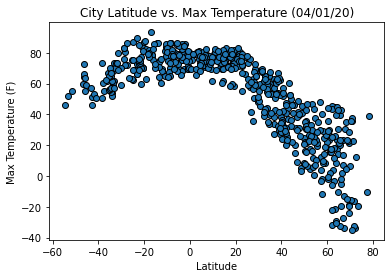

In [91]:
Latitude = city_df['Lat']
Max_Temperature = city_df['Max_Temp']
plt.scatter(Latitude,Max_Temperature, edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.savefig("../output_data/City_Latitude_vs_Max_Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

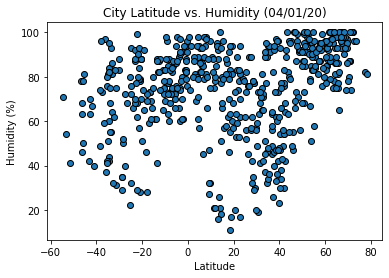

In [92]:
Latitude = city_df['Lat']
Max_Temperature = city_df['Humidity']
plt.scatter(Latitude,Max_Temperature, edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.savefig("../output_data/City_Latitude_vs_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

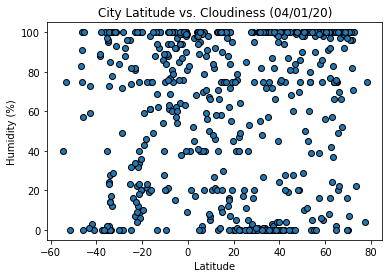

In [93]:
Latitude = city_df['Lat']
Max_Temperature = city_df['Cloudiness']
plt.scatter(Latitude,Max_Temperature, edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.savefig("../output_data/City_Latitude_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

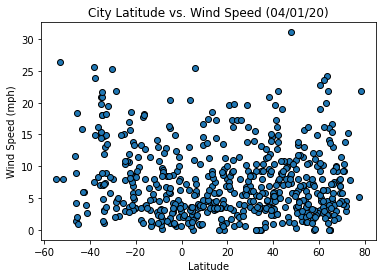

In [94]:
Latitude = city_df['Lat']
Max_Temperature = city_df['Wind_Speed']
plt.scatter(Latitude,Max_Temperature, edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.savefig("../output_data/City_Latitude_vs_wind_speed.png")
plt.show()

## Linear Regression

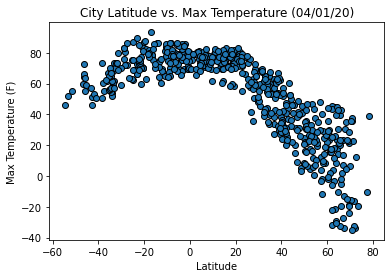

In [95]:
Latitude = city_df['Lat']
Max_Temperature = city_df['Max_Temp']
plt.scatter(Latitude,Max_Temperature, edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.show()

In [98]:
from scipy import stats

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [122]:
len(Latitude)

568

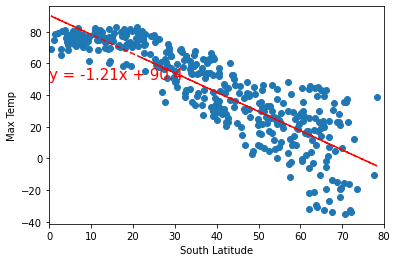

The r-squared is: 0.7395482409136492


In [154]:
South_Latitude = city_df[city_df['Lat'] >0]['Lat']
South_Temperature = city_df[city_df['Lat'] >0]['Max_Temp']
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(South_Latitude,South_Temperature)
pe_fit = pe_slope * South_Latitude + pe_int
line_eq = "y = " + str(round(pe_slope,2)) + "x + " + str(round(pe_int,2))
plt.scatter(South_Latitude,South_Temperature)
plt.plot(South_Latitude,pe_fit,"--", color = 'red')
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.xlabel('South Latitude')
plt.ylabel('Max Temp')
plt.xlim([0, 80])
plt.show()
print(f"The r-squared is: {pe_r**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

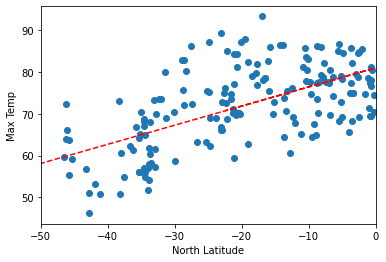

The r-squared is: 0.39925618153094333


In [155]:
North_Latitude = city_df[city_df['Lat'] <0]['Lat']
North_Temperature = city_df[city_df['Lat'] <0]['Max_Temp']
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(North_Latitude,North_Temperature)
pe_fit = pe_slope * North_Latitude + pe_int
line_eq2 = "y = " + str(round(pe_slope,2)) + "x + " + str(round(pe_int,2))
plt.scatter(North_Latitude,North_Temperature)
plt.plot(North_Latitude,pe_fit,"--", color = 'red')
plt.annotate(line_eq2,(-50,0),fontsize=10,color="red")
plt.xlabel('North Latitude')
plt.ylabel('Max Temp')
plt.xlim([-50, 0])
plt.show()
print(f"The r-squared is: {pe_r**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

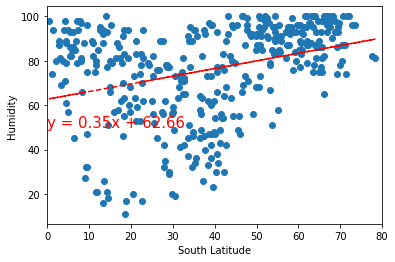

The r-squared is: 0.11068793279360967


In [156]:
South_Latitude = city_df[city_df['Lat'] >0]['Lat']
South_Humidity = city_df[city_df['Lat'] >0]['Humidity']
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(South_Latitude,South_Humidity)
pe_fit = pe_slope * South_Latitude + pe_int
line_eq = "y = " + str(round(pe_slope,2)) + "x + " + str(round(pe_int,2))
plt.scatter(South_Latitude,South_Humidity)
plt.plot(South_Latitude,pe_fit,"--", color = 'red')
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.xlabel('South Latitude')
plt.ylabel('Humidity')
plt.xlim([0, 80])
plt.show()
print(f"The r-squared is: {pe_r**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

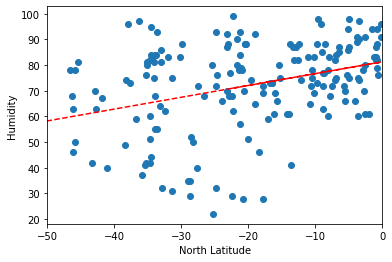

The r-squared is: 0.13237427272292937


In [157]:
North_Latitude = city_df[city_df['Lat'] <0]['Lat']
North_Humidity = city_df[city_df['Lat'] <0]['Humidity']
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(North_Latitude,North_Humidity)
pe_fit = pe_slope * North_Latitude + pe_int
line_eq2 = "y = " + str(round(pe_slope,2)) + "x + " + str(round(pe_int,2))
plt.scatter(North_Latitude,North_Humidity)
plt.plot(North_Latitude,pe_fit,"--", color = 'red')
plt.annotate(line_eq2,(-50,0),fontsize=10,color="red")
plt.xlabel('North Latitude')
plt.ylabel('Humidity')
plt.xlim([-50, 0])
plt.show()
print(f"The r-squared is: {pe_r**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

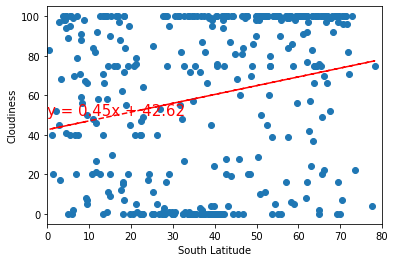

The r-squared is: 0.05094720657344955


In [158]:
South_Latitude = city_df[city_df['Lat'] >0]['Lat']
South_Cloudiness = city_df[city_df['Lat'] >0]['Cloudiness']
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(South_Latitude,South_Cloudiness)
pe_fit = pe_slope * South_Latitude + pe_int
line_eq = "y = " + str(round(pe_slope,2)) + "x + " + str(round(pe_int,2))
plt.scatter(South_Latitude,South_Cloudiness)
plt.plot(South_Latitude,pe_fit,"--", color = 'red')
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.xlabel('South Latitude')
plt.ylabel('Cloudiness')
plt.xlim([0, 80])
plt.show()
print(f"The r-squared is: {pe_r**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

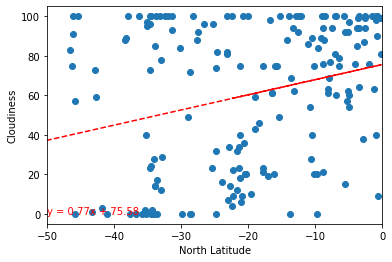

The r-squared is: 0.08254047042974778


In [159]:
North_Latitude = city_df[city_df['Lat'] <0]['Lat']
North_Cloudiness = city_df[city_df['Lat'] <0]['Cloudiness']
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(North_Latitude,North_Cloudiness)
pe_fit = pe_slope * North_Latitude + pe_int
line_eq2 = "y = " + str(round(pe_slope,2)) + "x + " + str(round(pe_int,2))
plt.scatter(North_Latitude,North_Cloudiness)
plt.plot(North_Latitude,pe_fit,"--", color = 'red')
plt.annotate(line_eq2,(-50,0),fontsize=10,color="red")
plt.xlabel('North Latitude')
plt.ylabel('Cloudiness')
plt.xlim([-50, 0])
plt.show()
print(f"The r-squared is: {pe_r**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

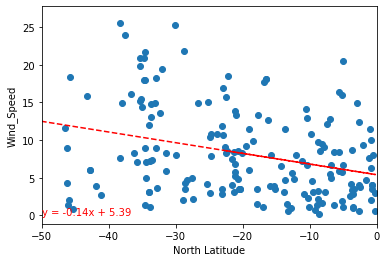

The r-squared is: 0.10423171423802871


In [160]:
North_Latitude = city_df[city_df['Lat'] <0]['Lat']
North_wind = city_df[city_df['Lat'] <0]['Wind_Speed']
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(North_Latitude,North_wind)
pe_fit = pe_slope * North_Latitude + pe_int
line_eq2 = "y = " + str(round(pe_slope,2)) + "x + " + str(round(pe_int,2))
plt.scatter(North_Latitude,North_wind)
plt.plot(North_Latitude,pe_fit,"--", color = 'red')
plt.annotate(line_eq2,(-50,0),fontsize=10,color="red")
plt.xlabel('North Latitude')
plt.ylabel('Wind_Speed')
plt.xlim([-50, 0])
plt.show()
print(f"The r-squared is: {pe_r**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

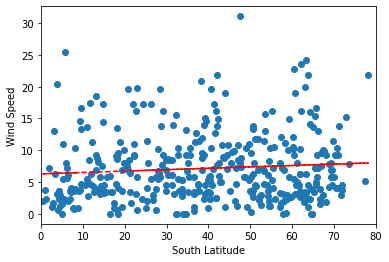

The r-squared is: 0.007135715175313825


In [162]:
South_Latitude = city_df[city_df['Lat'] >0]['Lat']
South_wind = city_df[city_df['Lat'] >0]['Wind_Speed']
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(South_Latitude,South_wind)
pe_fit = pe_slope * South_Latitude + pe_int
line_eq = "y = " + str(round(pe_slope,2)) + "x + " + str(round(pe_int,2))
plt.scatter(South_Latitude,South_wind)
plt.plot(South_Latitude,pe_fit,"--", color = 'red')
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.xlabel('South Latitude')
plt.ylabel('Wind Speed')
plt.xlim([0, 80])
plt.show()
print(f"The r-squared is: {pe_r**2}")

In [165]:
city_df.to_csv("../output_data/city_weather_part1_data.csv", index=False)